In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def report(y,s,a,row=0):
    print('=== y ===',len(y))
    print(y.iloc[row])
    print('=== s ===',len(s))
    print(s.iloc[row])
    print('=== a ===',len(a))
    print(a.iloc[row])

In [3]:
yerr = pd.read_csv("y_errors.csv")
spam = pd.read_csv("spam.csv",encoding='utf-8')
aster = pd.read_csv("aster.csv",encoding='utf-8')

In [4]:
# regex tester https://regex101.com
spam['datetime']  = spam[ 'datetime'].replace({'\.': '-'}, regex=True)
aster['datetime'] = aster['datetime'].replace({'\.': '-'}, regex=True)

In [5]:
# исправляем формат даты y
#yerr['Y']  = spam[ 'datetime'].replace({'\.': '-'}, regex=True)
def convert_date(current_string):
    year = current_string[:4]
    month = current_string[-len(current_string)+5:]
    month = month[:2]
    day = current_string[-len(current_string)+8:]
    day = day[:2]
    return day+'-'+month+'-'+year+current_string[-len(current_string)+10:]
yerr['error_datetime']=yerr['error_datetime'].apply(convert_date)

In [9]:
report(yerr,spam,aster)

=== y === 98294
error_timestamp               1599113056
error_datetime       03-09-2020 09:04:16
error_id            13534706988730770394
android_id              088d417307412c5e
app_version_name                       2
application_id                   3537259
os_version                         8.0.0
os_name                          android
connection_type                     wifi
operator_name                        MTS
Name: 0, dtype: object
=== s === 12214
datetime    08-09-2020 0:34:52
Name: 0, dtype: object
=== a === 10
datetime    08-09-2020 12:01:55
Name: 0, dtype: object


In [8]:
# отбор ошибок я.метрики по дню
y = pd.DataFrame()
y['day'] = yerr['error_datetime'].str.split().str[0]
y['error_datetime'] = yerr['error_datetime']
y = y[y['day']=='08-09-2020']
del y['day']
y.columns=(['datetime'])

In [10]:
# добавление колонки счетчика
y['cnt_y']=np.ones(len(y))
spam['cnt_s']=np.ones(len(spam))
aster['cnt_a']=np.ones(len(aster))

In [11]:
# убираем секунды из даты
y[    'datetime'] = y[    'datetime'].replace({':\d\d$': ':00'}, regex=True)
spam[ 'datetime'] = spam[ 'datetime'].replace({':\d\d$': ':00'}, regex=True)
aster['datetime'] = aster['datetime'].replace({':\d\d$': ':00'}, regex=True)

In [12]:
# подменяем 0 на 00
y[    'datetime'] = y[    'datetime'].replace({' [0-9]:': ' 00:'}, regex=True)
spam[ 'datetime'] = spam[ 'datetime'].replace({' [0-9]:': ' 00:'}, regex=True)
aster['datetime'] = aster['datetime'].replace({' [0-9]:': ' 00:'}, regex=True)

In [13]:
# группировка
y = y.groupby('datetime')['datetime'].count()
s = spam.groupby('datetime')['datetime'].count()
a = aster.groupby('datetime')['datetime'].count()

In [14]:
len(y),len(s),len(a)

(178, 661, 7)

In [15]:
# объединим в один дф
df = pd.DataFrame()
df = pd.concat([df,y], axis=1)
df = pd.concat([df,s], axis=1)
df = pd.concat([df,a], axis=1)
df.columns = (['y','s','a'])
# вернем колонку времени
df['datetime'] = df.index
# уберем NaN
df = df.fillna(0)

In [16]:
# Перевернем и умножим a для наглядности
df.a=df.a*-30

In [17]:
len(df)

781

In [20]:
# упорядочим по дате
df = df.sort_values('datetime')

In [22]:
df.columns = (['yandex','spam','aster','datetime'])

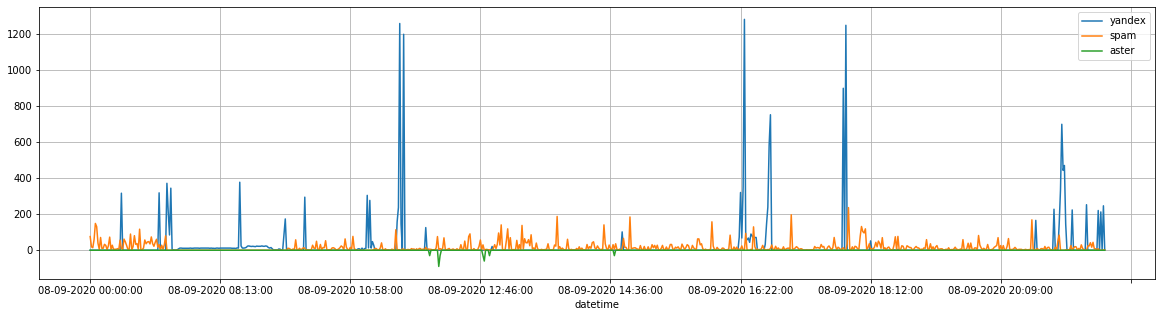

In [23]:
df.plot(
    x='datetime',
    y=['yandex','spam','aster'],
    figsize=(20,5),
    grid = True
)

In [24]:
print('yandex:',len(df[df.yandex>0]))
print('spam:',len(df[df.spam>0]))
print('aster:',len(df[df.aster<0]))

yandex: 178
spam: 661
aster: 7
